In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Matplotlib is building the font cache; this may take a moment.


In [7]:
df = pd.read_csv(r'C:\Ml Health Care project\framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
df.shape

(4240, 16)

In [9]:
df.keys()


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [11]:
df.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
#getting the percentage of null values in each column
df.isnull().mean() * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

<Axes: >

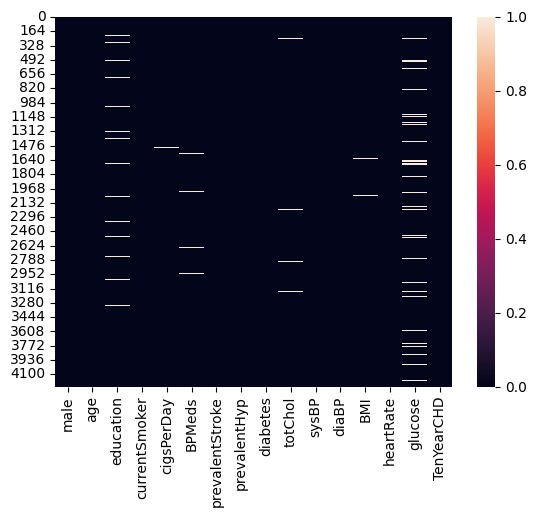

In [14]:
sns.heatmap(df.isnull())

In [15]:
# Retrieve column names with null values
column_with_nulls = df.columns[df.isnull().any()].tolist()
column_with_nulls

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

In [16]:
# Get numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Get columns with null values among numeric columns
numeric_columns_with_nulls = df[numeric_columns].columns[df[numeric_columns].isnull().any()].tolist()
numeric_columns_with_nulls

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

C:\Users\ANANGI PAVAN\AppData\Local\Temp\ipykernel_12568\2076807461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['education'])


<Axes: xlabel='education', ylabel='Density'>

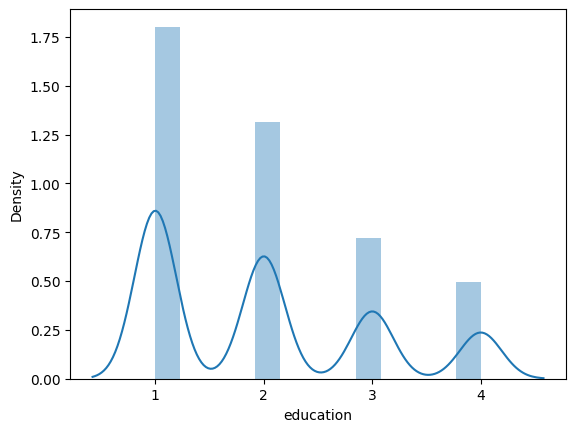

In [17]:

sns.distplot(df['education'])

C:\Users\ANANGI PAVAN\AppData\Local\Temp\ipykernel_12568\317129695.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axs[i], color='skyblue')
C:\Users\ANANGI PAVAN\AppData\Local\Temp\ipykernel_12568\317129695.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axs

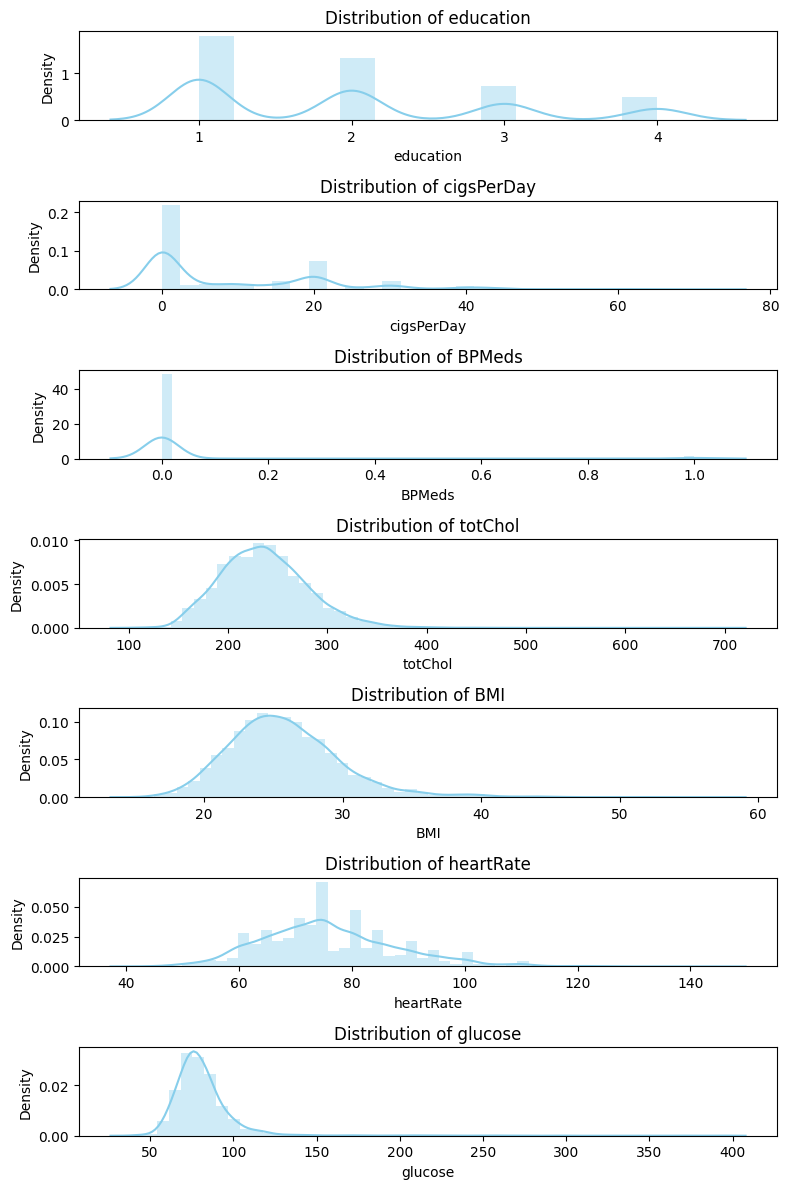

In [18]:
# Create subplots for 7 distribution plots
fig, axs = plt.subplots(len(numeric_columns_with_nulls), figsize=(8, 12))

# Plot distribution plots for each column
for i, column in enumerate(numeric_columns_with_nulls):
    #axs[i].hist(df[column], bins=30, color='skyblue') {use this if distplot wont work}
    sns.distplot(df[column], ax=axs[i], color='skyblue')
    axs[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [19]:
fill_median=['education','cigsPerDay']
fill_mean=['BPMeds','totChol','BMI','heartRate','glucose']

In [20]:
df2=df.copy()
# Fill missing values with median for 'education' and 'cigsPerDay'
for col in fill_median:
    median_value = df[col].median()
    df2[col].fillna(median_value, inplace=True)

# Fill missing values with mean for 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose'
for col in fill_mean:
    mean_value = df[col].mean()
    df2[col].fillna(mean_value, inplace=True)

C:\Users\ANANGI PAVAN\AppData\Local\Temp\ipykernel_12568\826604540.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(median_value, inplace=True)
C:\Users\ANANGI PAVAN\AppData\Local\Temp\ipykernel_12568\826604540.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



C:\Users\ANANGI PAVAN\AppData\Local\Temp\ipykernel_12568\1657934241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],bins=30,label='Original')
C:\Users\ANANGI PAVAN\AppData\Local\Temp\ipykernel_12568\1657934241.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[var],bins=30,label

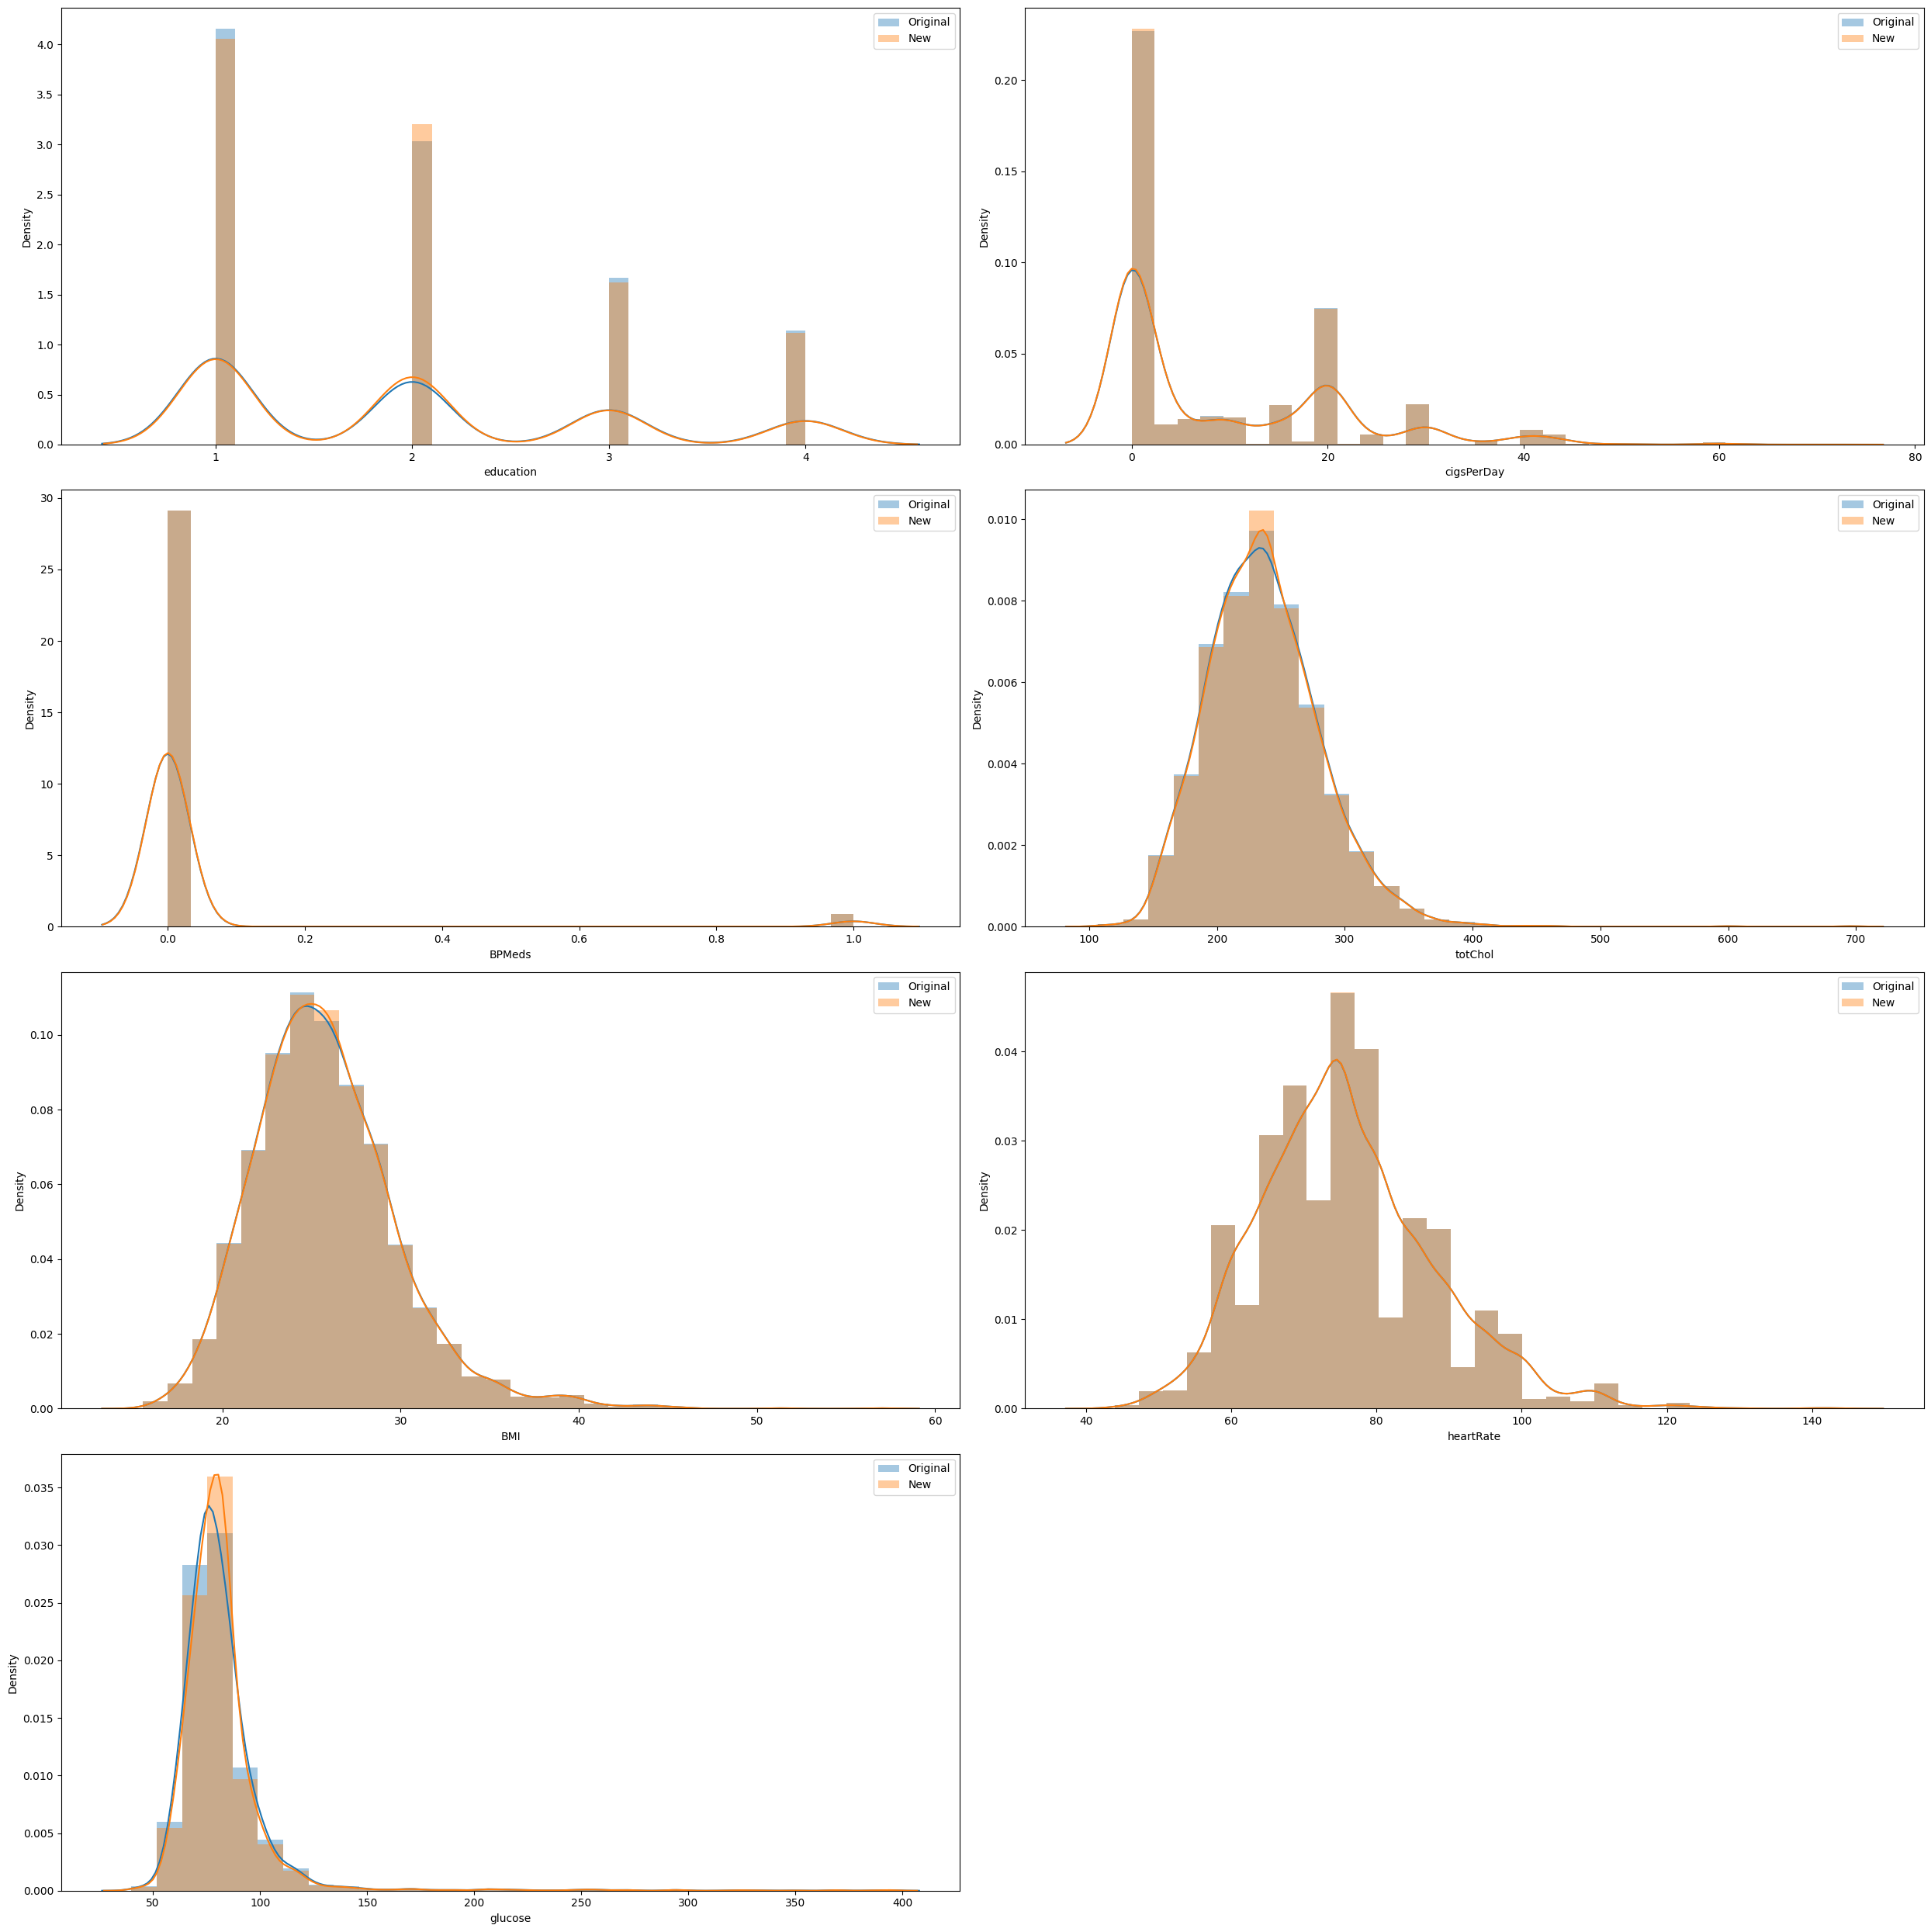

In [21]:
plt.figure(figsize=(25,25))
for i,var in enumerate(numeric_columns_with_nulls):
    plt.subplot(4,2,i+1)
    sns.distplot(df[var],bins=30,label='Original')
    sns.distplot(df2[var],bins=30,label='New')
    plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

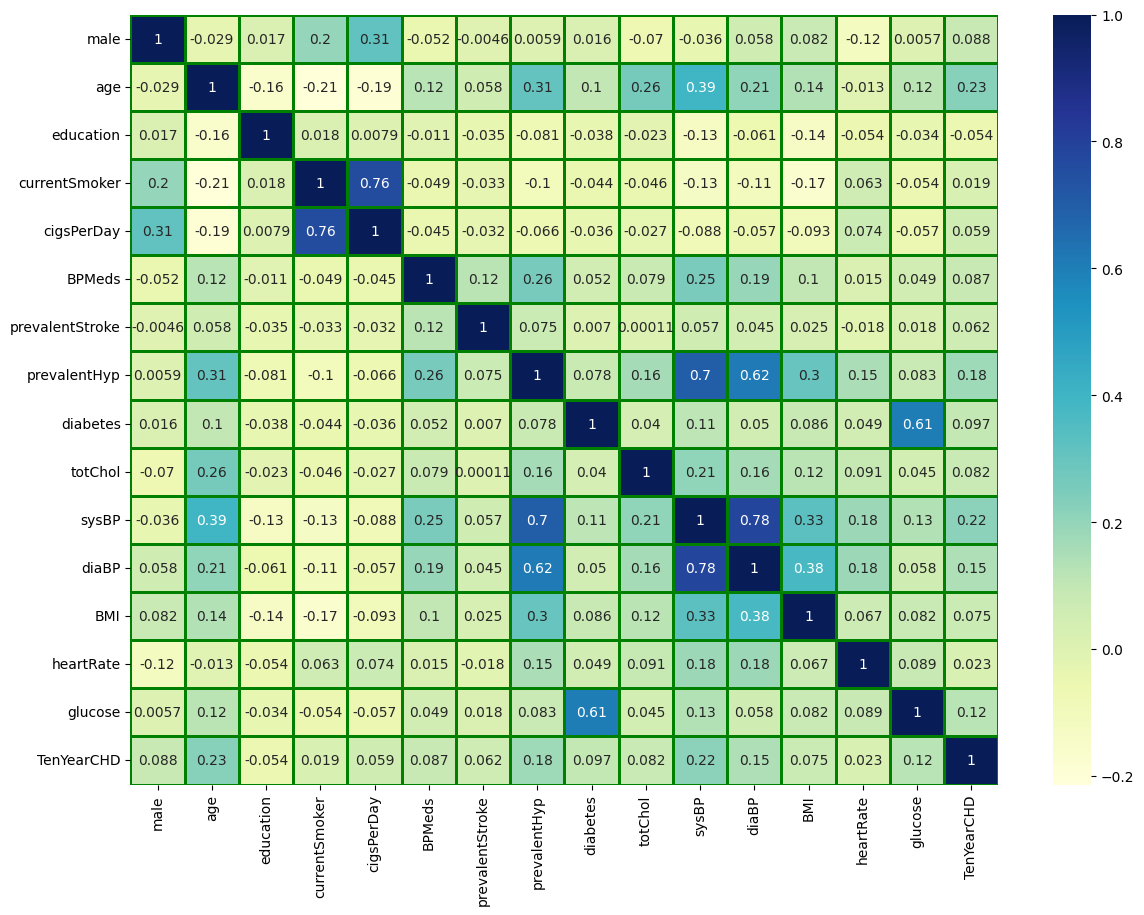

In [22]:
plt.figure(figsize = (14, 10))
sns.heatmap(df2.corr(), cmap='YlGnBu',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

model construction

In [23]:
# Split the DataFrame into features (X) and target (y)
X = df2.drop(columns=['TenYearCHD'])
y = df2['TenYearCHD']

In [24]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [25]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [26]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)

In [27]:
from sklearn.preprocessing import StandardScaler
cs=StandardScaler()
X_train=cs.fit_transform(X_train)
X_test=cs.transform(X_test)

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=21)

Training data

In [29]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=21)

testing data

In [30]:
y_pred = logreg.predict(X_test)


In [31]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[1068    8]
 [ 180   16]]


In [32]:
score = logreg.score(X_test, y_test)
print("Prediction score is:",score)

Prediction score is: 0.8522012578616353


In [33]:
import os
os.getcwd()

'c:\\Ml Health Care project'

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Constructing the SVM model
svm_model = SVC(kernel='poly',degree=2, random_state=21)

# Training the model
svm_model.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_test)

svm_model.score(X_test,y_test)

0.8474842767295597